In [1]:
import matplotlib.pyplot as plot
import matplotlib.animation
import numpy as np

In atomic units, the $n$-th energy level of a particle of mass $m$ in an infinte well of length $L$ is given by:
$$
E_n = \frac{n^2\pi^2}{2mL}
$$

The corresponding spatial wavefunction for the $n$-th energy level is given by: 
$$
\psi_n(x) = \sqrt{\frac{2}{L}}\sin\left(\frac{n\pi x}{L}\right)
$$

and the general time-dependent wavefunction is given by:
$$
\Psi(x, t) = \sum_{n=1}^\infty c_n(t)\psi_n(x)
$$

with $c_n(t) = c_n e^{-iE_n t}$

Projecting onto the PIB basis, the component of the $m$-th basis function is:
\begin{align}
\braket{\psi_m \mid \Psi} &= \sum_{n=1}^\infty c_n(t)\braket{\psi_m\mid\psi_n}\\
                                  &= \sum_{n=1}^\infty c_n(t)\delta_{mn}\\
                                  &= c_m(t)
\end{align}

In the same basis, the time-dependent probability density is given by:

\begin{align}
    \braket{\psi_n\mid\Psi}\braket{\Psi\mid\psi_m} &= 
        \left(\sum_{m=1}^\infty c_m(t)\braket{\psi_n\mid\psi_m}\right)
        \left(\sum_{n=1}^\infty c^*_n(t)\braket{\psi_n\mid\psi_m}\right)\\
        &=c_n(t)c^*_m(t)
\end{align}

Pretend we couldn't solve the Schrodinger equation for the $m$-th wavefunction component in the PIB basis,  $i \frac{d c_m(t)}{dt} = E_m c_m(t)$, analytically and instead had to solve it numerically using the Euler method we get:
$$
c_m(t_i) = c_m(t_{i-1}) - i E_m c_m(t_{i-1})\Delta t
$$

and the time-dependent probability density at time $t_i$ is given by:
\begin{align}
P_{nm}(t) = c_n(t)c^*_m(t) &=\left[c_n(t_{i-1}) - i E_n c_n(t_{i-1})\Delta t\right]
                 \left[c^*_m(t_{i-1}) + i E_m c^*_m(t_{i-1})\Delta t\right]\\
               &= c_n(t_{i-1})c^*_m(t_{i-1}) - 
                  i E_n c_n(t_{i-1})\Delta tc^*_m(t_{i-1})+
                  c_n(t_{i-1})i E_m c^*_m(t_{i-1})\Delta t+
                  E_n c_n(t_{i-1})\Delta t E_m c^*_m(t_{i-1})\Delta t\\
               &= P_{nm}(t_{i-1}) \left(1 + i\left[E_m - E_n\right]\Delta t + E_n E_m \Delta t^2 \right)
\end{align}

                  
In real-space:
\begin{align}
    \left|\Psi(x,t)\right|^2 &= \sum_{n,m} P_{nm}(t)\psi_m(x) \psi_n(x)\\
                             &=  \sum_{n,m}P_{nm}(t_{i-1})\psi_m(x) \psi_n(x)\left(1+ E_n E_m \Delta t^2 \right)
\end{align}

where the last line uses the fact that in summing over all $n,m$, the imaginary term will be summed with its complex conjugate.

\begin{align}
    \left|\Psi(x,t)\right|^2 &= \sum_{n,m=1}^\infty e^{i\left(E_n - E_m\right)t}c_n c_m \psi_n(x)\psi_m(x)\\
                             &= \sum_{n=1}^\infty c_n^2 \psi_n^2(x) + 
                                \sum_{n < m}^\infty 2\cos\left[\left(E_n - E_m\right)t\right] c_n c_m \psi_n(x)\psi_m(x)
\end{align}

where the last line is obtained by relying on $ e^{i\theta}+e^{-i\theta} = 2 \cos\left(\theta\right)$.
                          

In [33]:
L = 1
mass = 1
c = np.array([1/np.sqrt(2) + 0j, 1/np.sqrt(2) + 0j])

def egy(p):
    return p * p * np.pi * np.pi / (2 * mass * L)

def time_dependent_coefficient(c, t):
    rv = np.zeros((len(c), ), dtype=complex)
    for i in range(len(c)):
        rv[i] = c[i] * np.exp(-1.0j * egy(i+1) * t)
    return rv

energies = [egy(i + 1) for i in range(len(c))]
ct = time_dependent_coefficient(c, 0.01)
print(energies)
print(ct)
    

[4.934802200544679, 19.739208802178716]
[0.70624597-0.03488016j 0.69337573-0.13867264j]


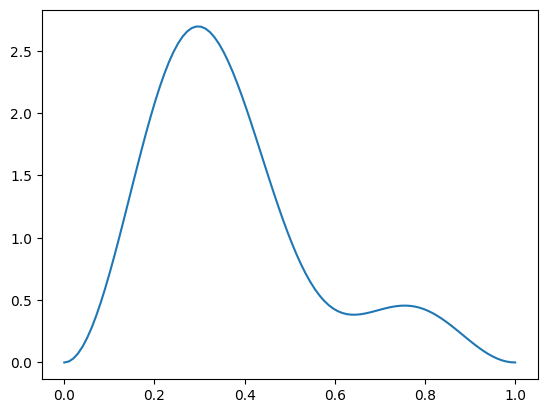

In [ ]:
def spatial_wavefunction(p, x):
    return np.sqrt(2.0 / L) * np.sin(p * np.pi * x/ L)

def probability_density(x, t):
    value_at_x = 0.0
    for p in range(len(c)):
        p1 = p + 1
        psi_p = spatial_wavefunction(p1, x)
        cp   = c[p]
        egy_p = egy(p1)
        value_at_x += cp * cp * psi_p * psi_p
        
        for q in range(p1, len(c)):
            q1 = q + 1
            psi_q = spatial_wavefunction(q1, x)
            cq = c[q]
            egy_q = egy(q1)
            value_at_x += 2 * np.cos((egy_p - egy_q) * t) * cp * cq * psi_p * psi_q
    
    return value_at_x

def approx_probability_density(x, dt):
    value_at_x = 0.0
    for p in range(len(c)):
        p1 = p + 1
        psi_p = spatial_wavefunction(p1, x)
        cp   = c[p]
        egy_p = egy(p1)
        
        for q in range(len(c)):
            q1 = q + 1
            psi_q = spatial_wavefunction(q1, x)
            cq = c[q]
            egy_q = egy(q1)
            value_at_x += cp * cq * psi_p * psi_q * (1 + egy_p * egy_q *dt * dt)
    
    return value_at_x
    
x1 = np.linspace(0, L, 100)
fig, ax = plot.subplots()

ax.plot(x1, probability_density(x1, 0.05))    
plot.show()

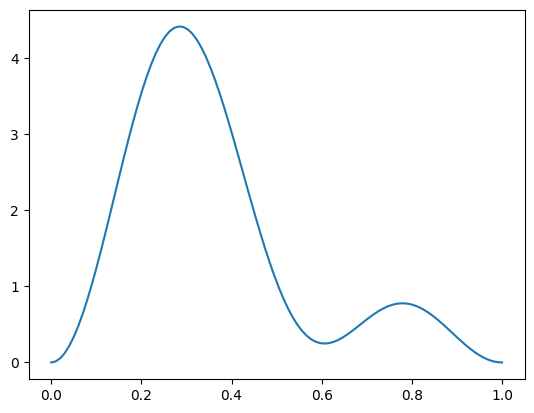

In [22]:
fig, ax = plot.subplots()
ax.plot(x1, approx_probability_density(x1, 0.05))
plot.show()